# 📌 2. Exploratory Data Analysis & Visualization


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from textblob import TextBlob

## [1] Data Load & Clean



### (1) Data Load

In [ ]:
# data load from google drive
data = pd.read_csv("https://drive.google.com/uc?id=1apMpnbcfHJTwvDkwRggUur4KxKud9kln")
data.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,True,False,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[]
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,True,False,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor']
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,True,False,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[]
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,True,False,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[]
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,True,False,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[]


### (2) Check the shape of the dataset and data types

In [ ]:
# Check the shape of the dataset and data types

shape_of_data = data.shape
data_types = data.dtypes

print(shape_of_data)
print(data_types)

(10000, 23)
title                         object
link                          object
date                          object
source                        object
country                       object
language                      object
translated_title              object
number_of_characters_title     int64
number_of_words_title          int64
day_of_week                   object
month                          int64
year                           int64
quarter                        int64
is_weekend                      bool
is_holiday                      bool
source_type                   object
final_redirected_URL          object
domain_of_URL                 object
subdomain_of_URL              object
URL_depth                      int64
top_level_domain              object
url_length                     int64
author                        object
dtype: object


### (3) Check for any null values & duplicate values in 'translated_title'

In [ ]:
# Check for any null values
null_values = data.isnull().sum()
null_values

title                           0
link                            0
date                            0
source                          0
country                         0
language                        0
translated_title                0
number_of_characters_title      0
number_of_words_title           0
day_of_week                     0
month                           0
year                            0
quarter                         0
is_weekend                      0
is_holiday                      0
source_type                     0
final_redirected_URL            0
domain_of_URL                 237
subdomain_of_URL              237
URL_depth                       0
top_level_domain              237
url_length                      0
author                          0
dtype: int64

### (4) Data Clean: Divide 'translated_title' into 'news_title' and 'news_source'

In [ ]:
# Divide 'translated_title' into 'news_title' and 'news_source'
data[['news_title', 'news_source']] = data['translated_title'].str.split(' - ', 1, expand=True)

<ipython-input-5-5abc322606f9>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['news_title', 'news_source']] = data['translated_title'].str.split(' - ', 1, expand=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       10000 non-null  object
 1   link                        10000 non-null  object
 2   date                        10000 non-null  object
 3   source                      10000 non-null  object
 4   country                     10000 non-null  object
 5   language                    10000 non-null  object
 6   translated_title            10000 non-null  object
 7   number_of_characters_title  10000 non-null  int64 
 8   number_of_words_title       10000 non-null  int64 
 9   day_of_week                 10000 non-null  object
 10  month                       10000 non-null  int64 
 11  year                        10000 non-null  int64 
 12  quarter                     10000 non-null  int64 
 13  is_weekend                  10000 non-null  boo

## [2] Exploratory Analysis of Text



### (1) 'Top 10 words' in 'news_title'

In [ ]:
# We check 'Top 10 words' in 'news_title'
words = pd.Series(' '.join(data['news_title']).lower().split())
top_10_words = words.value_counts().head(10)

top_10_words

ai              7183
to              2928
the             2689
...             2305
and             1880
of              1819
artificial      1677
in              1671
intelligence    1493
for             1465
dtype: int64

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

# We need to filter some meaningless words
# Using nltk library to filter some words
nltk.download('stopwords')
stop = stopwords.words('english')
stop.extend(['...', 'to', 'the', 'for', 'of', 'in', 'as', 'is', 'a', 'on', 'with',
             'how', 'will', 'an', 'can', 'are', 'at', 'I', 'what', 'it', 'your','about',
             'could', 'says', 'that'])

# Change all 'new_title' to lower case, and filter the stop words
words = pd.Series(' '.join(data['news_title']).lower().split())
filtered_words = words[~words.isin(stop)]

# Recheck the top_10 words in the 'news_title'
top_10_filtered_words = filtered_words.value_counts().head(10)

print(top_10_filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


ai              7183
artificial      1677
intelligence    1493
generative       992
new              738
chatbot          629
google           358
launches         343
model            303
use              294
dtype: int64


### (2) 'Top 10 words' in 'news_source'

In [ ]:
# Also, we check which 'news_source' is top 10
top_10_news_source = data['news_source'].value_counts().head(10)
top_10_news_source

Yahoo Finance      201
Forbes             191
MarkTechPost       152
The Motley Fool    130
Reuters            109
AI Times           106
The Guardian        86
PR Newswire         81
Medium              74
TechCrunch          73
Name: news_source, dtype: int64

### (3) The article amount by 'month','quarter'

In [ ]:
# We check the article amount by 'month','quarter'

data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter

articles_by_month = data['month'].value_counts().sort_index()
articles_by_quarter = data['quarter'].value_counts().sort_index()

print(articles_by_month)
articles_by_quarter

5      550
6      878
7      750
8      979
9      935
10    2917
11    2991
Name: month, dtype: int64


2    1428
3    2664
4    5908
Name: quarter, dtype: int64

### (4) Articles count by Country

In [ ]:
data['country'].value_counts()

US    10000
Name: country, dtype: int64

### (5) Articles count by Languages used (Top 10)

In [ ]:
byLang = data.groupby('language').agg(count=('title','count')).sort_values('count', ascending=False)
byLang['pct'] = round(byLang['count']*100/sum(byLang['count']), 2)
byLang.head(10)

,count,pct
language,,
en,8390,83.90
ko,375,3.75
ja,195,1.95
es,188,1.88
fr,119,1.19
id,92,0.92
de,90,0.90
vi,80,0.80
pt,67,0.67


### (6) Articles count by weekdays or weekend/holidays and also by Month

In [ ]:
import numpy as np

data['is_weekend'] = np.where(data['is_weekend']==True, 1, 0)
data['is_holiday'] = np.where(data['is_holiday']==True, 1, 0)
data['is_weekday'] = np.where((data['is_weekend']==0) & (data['is_holiday']==0), 1, 0)
data['is_weekend_holiday'] = np.where((data['is_weekend']>0) | (data['is_holiday']>0), 1, 0)

In [ ]:
data[['is_holiday','is_weekend','is_weekday']].value_counts() # 120 #ofDays are both weekend and holiday

is_holiday  is_weekend  is_weekday
0           0           1             7978
            1           0             1275
1           0           0              627
            1           0              120
dtype: int64

In [ ]:
data[['is_weekend_holiday','is_weekday']].sum() # Combined weekend and holidays to compare with weekday for the articles count

is_weekend_holiday    2022
is_weekday            7978
dtype: int64

In [ ]:
byMonth = data.groupby(['month']).agg({'is_weekend_holiday':'sum', 'is_weekday':'sum'})
byMonth['tot_count'] = byMonth['is_weekend_holiday']+byMonth['is_weekday']
byMonth['tot_count(%)'] = round(byMonth['tot_count']*100/sum(byMonth['tot_count']), 2)
byMonth

,is_weekend_holiday,is_weekday,tot_count,tot_count(%)
month,,,,
5,56,494,550,5.50
6,107,771,878,8.78
7,131,619,750,7.50
8,96,883,979,9.79
9,172,763,935,9.35
10,693,2224,2917,29.17
11,767,2224,2991,29.91


### (7) Articles count by Day of the week

In [ ]:
byDay = data['day_of_week'].value_counts().rename_axis('Day').reset_index(name='counts')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
byDay['Day'] = pd.Categorical(byDay['Day'], categories=days, ordered=True)
byDay = byDay.sort_values('Day')

byDay

,Day,counts
3,Monday,1649
2,Tuesday,1668
0,Wednesday,1916
1,Thursday,1900
4,Friday,1472
6,Saturday,609
5,Sunday,786


### (8) Articles count by Date

In [ ]:
byDate = data['date'].value_counts().rename_axis('date').reset_index(name='count')
byDate

,date,count
0,2023-11-07,336
1,2023-11-08,327
2,2023-11-01,327
3,2023-11-03,314
4,2023-10-02,311
...,...,...
75,2023-06-11,22
76,2023-06-03,21
77,2023-07-02,17
78,2023-07-08,15


### (9) Articles count by Source Type

In [ ]:
bySourceType = data['source_type'].value_counts().rename_axis('Source_type').reset_index(name='count')
bySourceType['%'] = round(bySourceType['count']*100/sum(bySourceType['count']), 2)
bySourceType

,Source_type,count,%
0,Other,4028,40.28
1,News Outlet,3722,37.22
2,Blog,879,8.79
3,Magazine,408,4.08
4,Press Release Service,394,3.94
5,Academic Journal,382,3.82
6,Broadcast Media,140,1.40
7,Corporate,34,0.34
8,Online Forum,13,0.13


## [3] Visualization

### (1) Wordcloud analysis

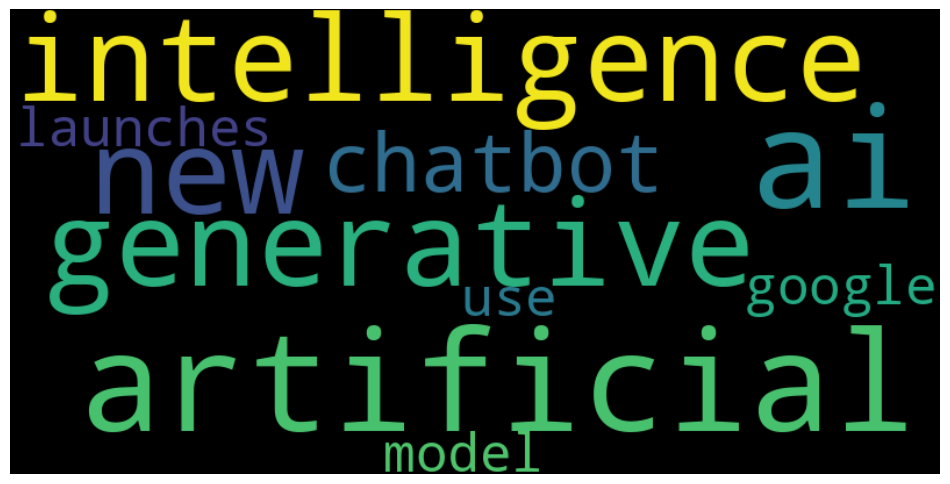

In [ ]:
# Wordcloud for 'Top10_news_title'
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words_string = ' '.join(top_10_filtered_words.index)
wordcloud = WordCloud(width=800, height=400).generate(words_string)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### (2)  Bar plots for various analysis

#### Bar plot for top 10 words

<ipython-input-21-43b528a987e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_filtered_words.index, y=top_10_filtered_words.values, palette=bar_top10_palette)


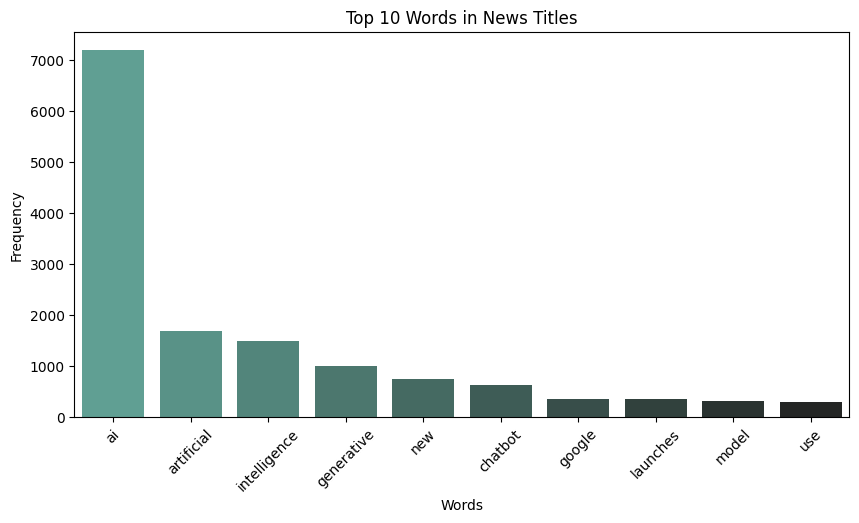

In [ ]:
# Bar plots for various analysis

# Bar plot for top 10 words
bar_top10_palette = sns.color_palette("dark:#5A9_r", 10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_filtered_words.index, y=top_10_filtered_words.values, palette=bar_top10_palette)
plt.title('Top 10 Words in News Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Bar plot for top 10 news sources

<ipython-input-22-8bbf3e170d98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_news_source.values, y=top_10_news_source.index, palette=bar_top10_palette)


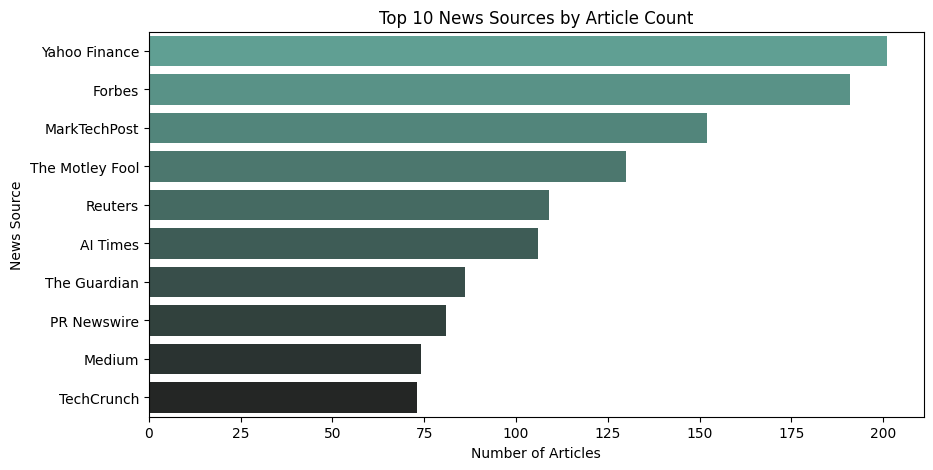

In [ ]:
# Bar plot for top 10 news sources
plt.figure(figsize=(10, 5))
bar_top10_palette = sns.color_palette("dark:#5A9_r", 10)
sns.barplot(x=top_10_news_source.values, y=top_10_news_source.index, palette=bar_top10_palette)
plt.title('Top 10 News Sources by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('News Source')
plt.show()

#### Bar plot for articles by month

<ipython-input-23-56084e5b9f23>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=articles_by_month.index, y=articles_by_month.values, palette=bar_month_palette)


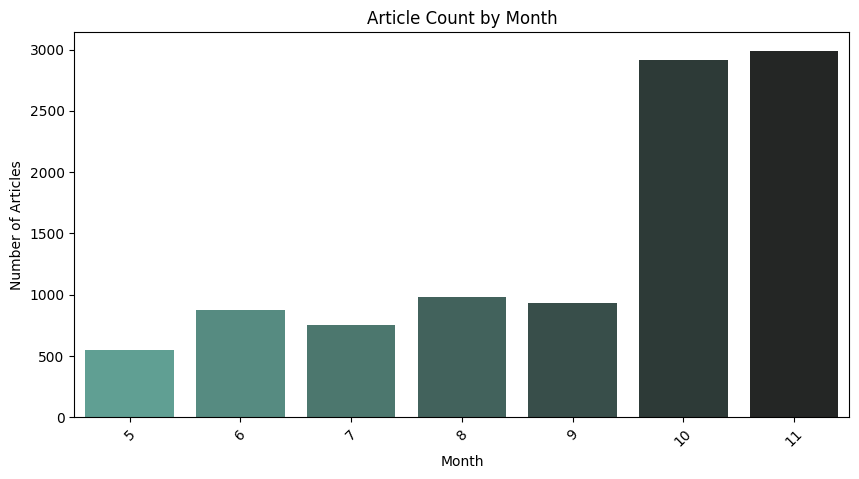

In [ ]:
# Bar plot for articles by month
plt.figure(figsize=(10, 5))
bar_month_palette = sns.color_palette("dark:#5A9_r", 7)
sns.barplot(x=articles_by_month.index, y=articles_by_month.values, palette=bar_month_palette)
plt.title('Article Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

#### Bar plot for articles by quarter

<ipython-input-24-35158715e764>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=articles_by_quarter.index, y=articles_by_quarter.values, palette=bar_quarter_palette)


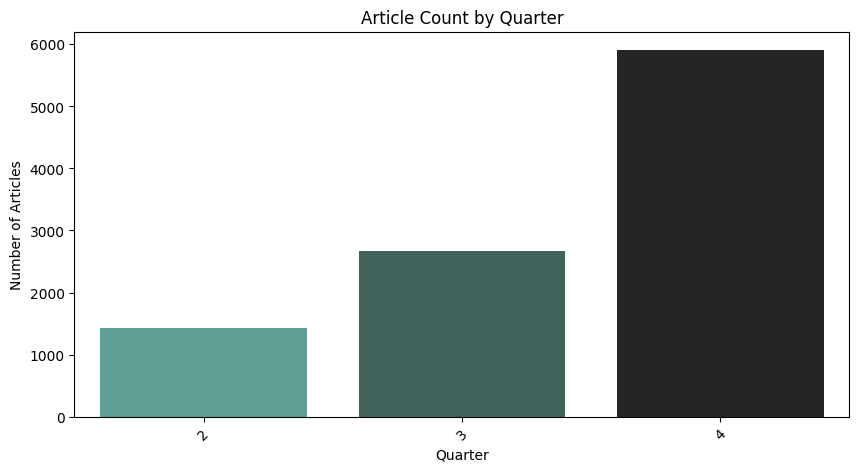

In [ ]:
# Bar plot for articles by quarter
plt.figure(figsize=(10, 5))
bar_quarter_palette = sns.color_palette("dark:#5A9_r", 3)
sns.barplot(x=articles_by_quarter.index, y=articles_by_quarter.values, palette=bar_quarter_palette)
plt.title('Article Count by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

#### Top 10 Languages used

Text(0, 0.5, '%')

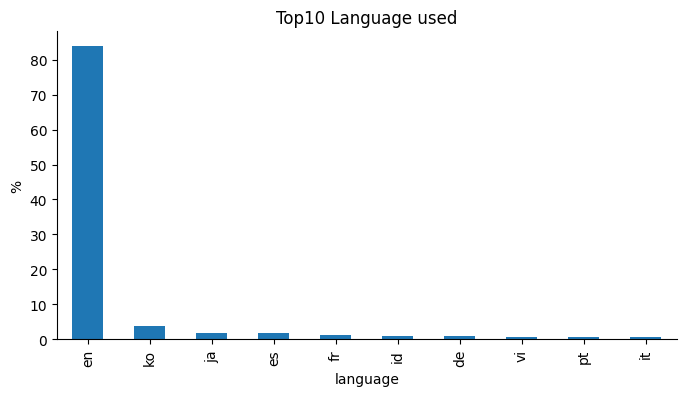

In [ ]:
byLang['pct'].head(10).plot(kind='bar', figsize=(8, 4), title='Top10 Language used')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('%')

#### Articles count per Month

Text(0.5, 0, 'count')

<Figure size 800x400 with 0 Axes>

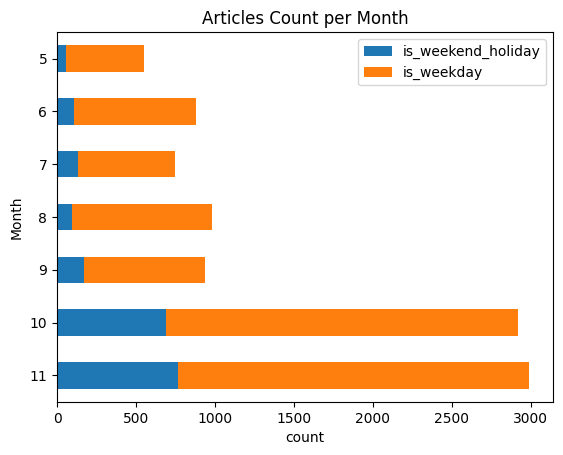

In [ ]:
plt.figure(figsize=(8, 4))

plot_col = byMonth[['is_weekend_holiday','is_weekday']].sort_values('month', ascending=False)
plot_col.plot(kind='barh', stacked=True)

plt.title('Articles Count per Month')
plt.ylabel('Month')
plt.xlabel('count')

#### Articles count by Day of week

Text(0, 0.5, 'Count')

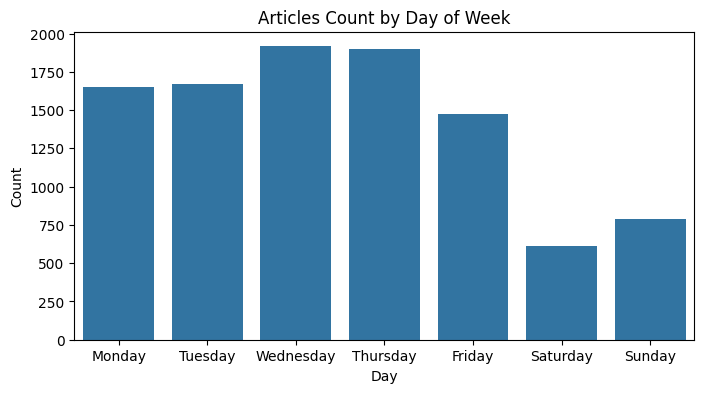

In [ ]:
plt.figure(figsize=(8, 4))

sns.barplot(byDay, x='Day',y='counts')

plt.title('Articles Count by Day of Week')
plt.ylabel('Count')

#### Articles count by Date

Text(0.5, 1.0, 'Articles Count by Date')

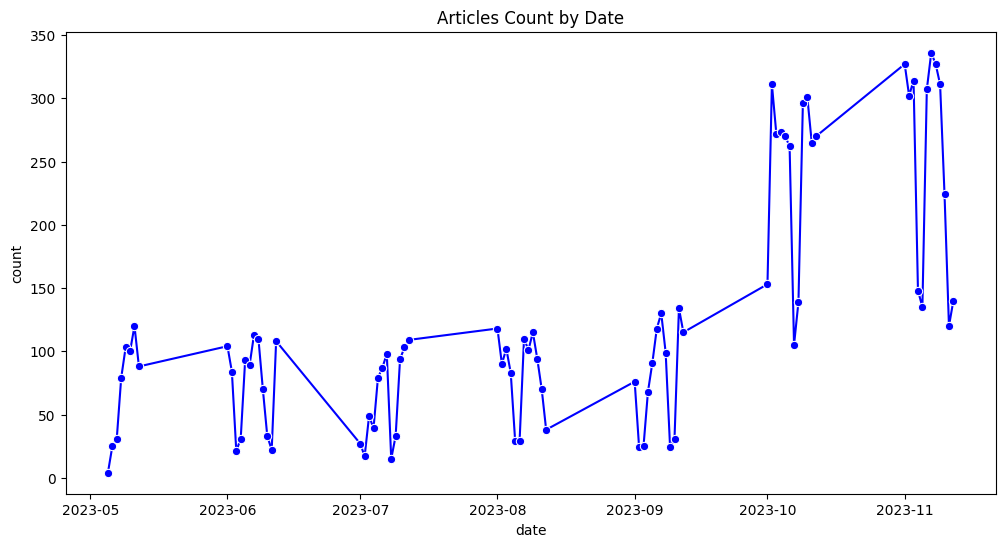

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=byDate, x='date', y='count', marker='o', color='blue')
plt.title('Articles Count by Date')

# 📌3. Analysis & Interpretation

## [1] Using 'Textblob' library for analyzing


### (1) Analyzing sentiment of 'news_title'

In [ ]:
from textblob import TextBlob

## Analyzing sentiment of the news titles
data['sentiment'] = data['news_title'].apply(lambda title: TextBlob(title).sentiment.polarity)
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

## Map the categorical sentiment labels to numerical values
sentiment_numerical_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
data['sentiment_numerical'] = data['sentiment_category'].map(sentiment_numerical_mapping)

## Checking the first few rows to ensure the process went as expected
data[['translated_title', 'news_title', 'news_source', 'sentiment', 'sentiment_category','sentiment_numerical']]

## Save sent_data as new dataframe
sent_data = data
sent_data.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,top_level_domain,url_length,author,news_title,news_source,is_weekday,is_weekend_holiday,sentiment,sentiment_category,sentiment_numerical
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,ch,99,[],Can artificial intelligence replace small talk?,View,0,1,-0.425,Negative,-1
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,cz,118,['Autor'],People trust chatbots more easily. Emotional A...,iDNES.cz,0,1,0.250,Positive,1
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,com,114,[],How to implement AI in online commerce?,Digital HR,0,1,0.000,Neutral,0
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE",ZEIT ONLINE English,0,1,-0.125,Negative,-1
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,com,93,[],Tips to win the Artificial Intelligence lottery,C5N,0,1,0.100,Positive,1


In [ ]:
## Check the send_data data shape & data type
shape_of_sent_data = sent_data.shape
sent_data_types = sent_data.dtypes

print(shape_of_sent_data)
print(sent_data_types)

(10000, 30)
title                                 object
link                                  object
date                          datetime64[ns]
source                                object
country                               object
language                              object
translated_title                      object
number_of_characters_title             int64
number_of_words_title                  int64
day_of_week                           object
month                                  int64
year                                   int64
quarter                                int64
is_weekend                             int64
is_holiday                             int64
source_type                           object
final_redirected_URL                  object
domain_of_URL                         object
subdomain_of_URL                      object
URL_depth                              int64
top_level_domain                      object
url_length                             int6

In [ ]:
# Change data type
sent_data['sentiment_category'] = sent_data['sentiment_category'].astype(str)
sent_data['sentiment_numerical'] = pd.to_numeric(sent_data['sentiment_numerical'], errors='coerce')

# Check the data types to confirm the changes
sent_data_types = sent_data.dtypes
sent_data_types[['sentiment_category', 'sentiment_numerical']]

sentiment_category      object
sentiment_numerical    float64
dtype: object

#### Analyzing Average Sentiment Score by Month

In [ ]:
sent_data['date'] = pd.to_datetime(sent_data['year'].astype(str) + '-' +
                                        sent_data['month'].astype(str))

# Set the date as the index of the dataframe
sent_data.set_index('date', inplace=True)

# Sort the dataframe by the index
sent_data.sort_index(inplace=True)

# Now, let's calculate the average sentiment over time
# We'll also consider the 'sentiment_numerical' which is already the numerical representation of sentiment
average_sentiment_over_time = sent_data.resample('M')['sentiment_numerical'].mean()

# Check the first few entries of the average sentiment over time
average_sentiment_over_time

date
2023-05-31    0.001818
2023-06-30   -0.031891
2023-07-31   -0.050667
2023-08-31    0.008172
2023-09-30    0.020343
2023-10-31    0.085420
2023-11-30    0.055221
Freq: M, Name: sentiment_numerical, dtype: float64

#### Plotting the average sentiment over time

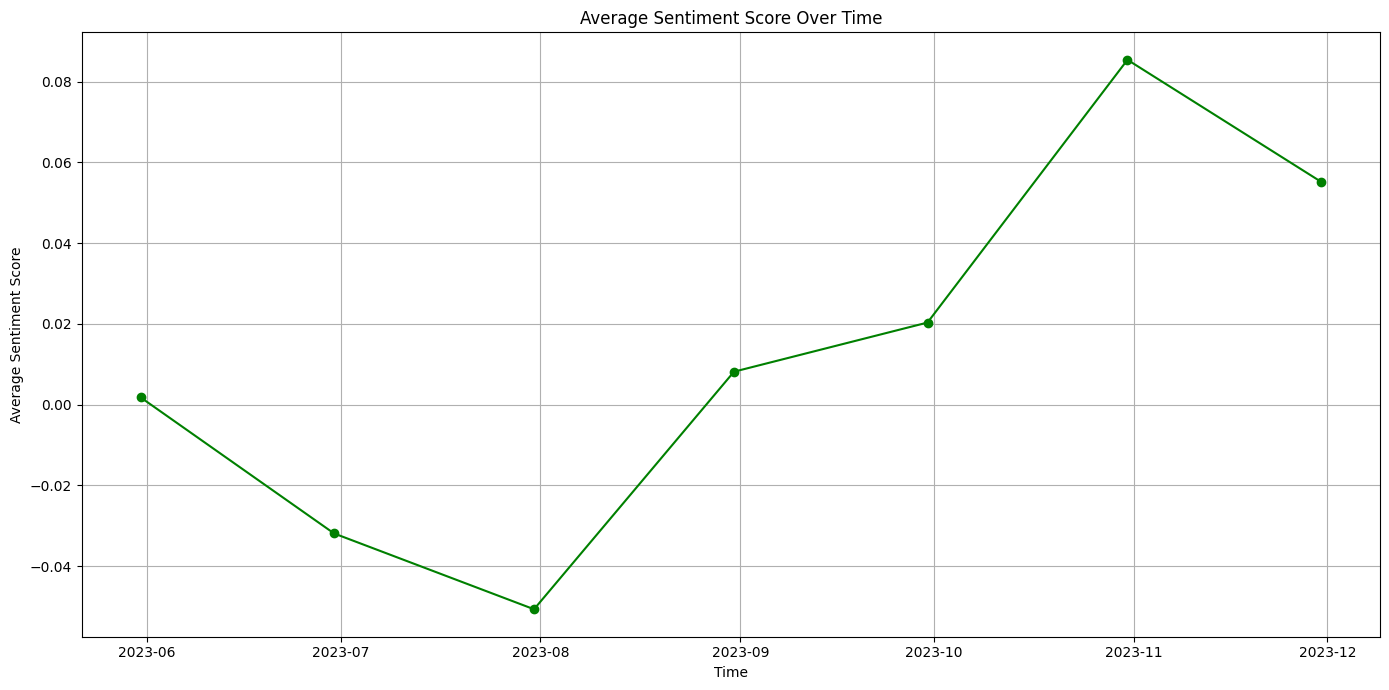

In [ ]:
# Plotting the average sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, marker='o', linestyle='-', color='green')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### (2) Sentiment Distribution Analysis by Month

<Figure size 1200x700 with 0 Axes>

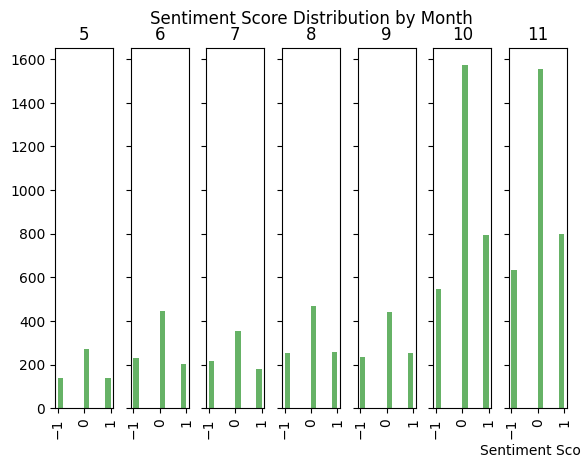

In [ ]:
# Group the data by year and plot histograms
plt.figure(figsize=(12, 7))
sent_data['sentiment_numerical'].hist(by=sent_data.index.month, bins=10, color='green', layout=(1, sent_data.index.month.nunique()), sharey=True, alpha=0.6)
plt.suptitle('Sentiment Score Distribution by Month')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## [2] Bart-large-mnli with Zero Shot Classification

---



#### (1) Classify Sentiment by Four Categories

In [ ]:
def remove_text_after_dash(text):
    return text.split(' -')[0]

data_mnli = data
data_mnli['translated_title'] = data_mnli['translated_title'].apply(remove_text_after_dash)

In [ ]:
import torch
from transformers import pipeline
from tqdm.auto import tqdm

device = 0 if torch.cuda.is_available() else -1

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)
candidate_labels = ["happiness", "surprise", "fear", "neutral"]

def get_sentiment(text):
    result = classifier(text, candidate_labels)
    return result['labels'][0], result['scores'][0]

tqdm.pandas()
data_mnli['sentiment_label'], data_mnli['sentiment_score'] = zip(*data_mnli['translated_title'].progress_apply(get_sentiment))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


<ipython-input-5-c2db08ab622d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


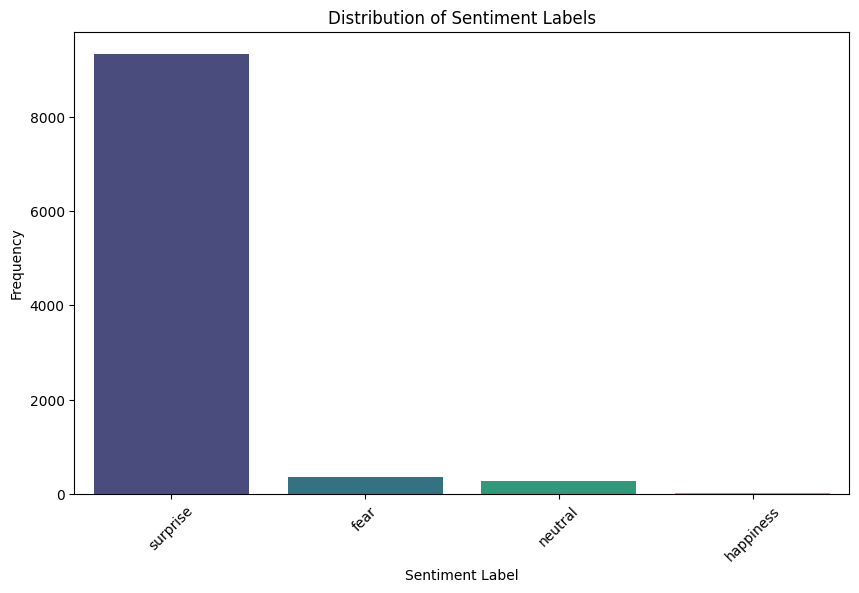

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = data_mnli['sentiment_label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### (2) Analysis on emotion 'Surprise'

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

characters_to_remove = [',', ':', '$', '(', ')', '?', "'s", '%', '‘', '’', '``', "''", '?','"','"','...','&','|', '“', '”','–','.']
pattern = re.compile('|'.join(map(re.escape, characters_to_remove)))

def process_title(title):
    title = pattern.sub('', title.lower())
    words = [word for word in word_tokenize(title) if word not in STOPWORDS]
    return words

In [ ]:
data_surprise = data_mnli.loc[data_mnli['sentiment_label'] == 'surprise']

In [ ]:
from textblob import TextBlob

data_surprise['sentiment'] = data_surprise['translated_title'].apply(lambda title: TextBlob(title).sentiment.polarity)
data_surprise['sentiment_category'] = pd.cut(data_surprise['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_numerical_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
data_surprise['sentiment_numerical'] = data_surprise['sentiment_category'].map(sentiment_numerical_mapping)

data_surprise[['translated_title','sentiment', 'sentiment_category','sentiment_numerical']].head()

<ipython-input-9-f6a26cbf1d21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surprise['sentiment'] = data_surprise['translated_title'].apply(lambda title: TextBlob(title).sentiment.polarity)
<ipython-input-9-f6a26cbf1d21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surprise['sentiment_category'] = pd.cut(data_surprise['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
<ipython-input-9-f6a26cbf1d21>:7: SettingWithCopyWarning: 
A value is trying to be set on

,translated_title,sentiment,sentiment_category,sentiment_numerical
0,Can artificial intelligence replace small talk?,-0.425,Negative,-1
1,People trust chatbots more easily. Emotional A...,0.250,Positive,1
2,How to implement AI in online commerce?,0.000,Neutral,0
3,"Controlling AI: Be careful, AI! | ZEIT ONLINE",-0.125,Negative,-1
4,Tips to win the Artificial Intelligence lottery,0.100,Positive,1


<ipython-input-10-872185f38c63>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel')


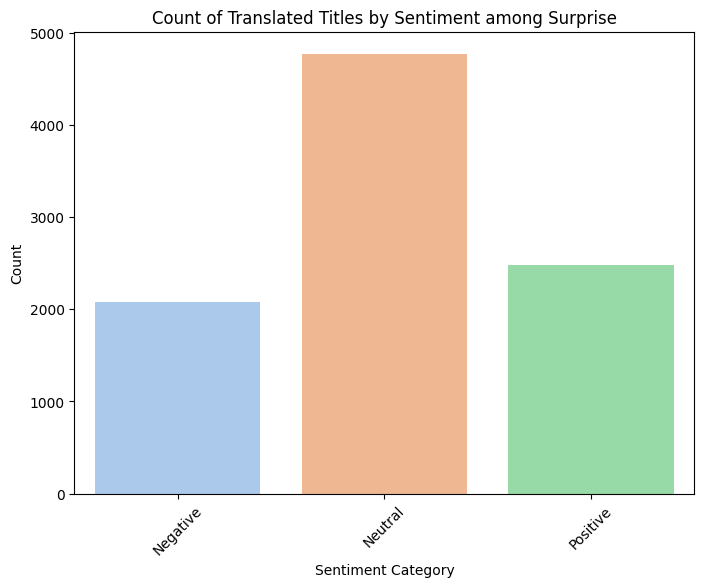

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = data_surprise.groupby('sentiment_category')['translated_title'].count()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel')
plt.title('Count of Translated Titles by Sentiment among Surprise')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## [3] DistilRoBERTa

### [3.1] Emotion-english-distilroberta-base Model(Model Training w/ titles with full sentence only)

#### (1) Separate 'translated_title' into two types:
- Full sentence
- Sentence that ends with '...'

In [ ]:
notitle_df = data_mnli[data_mnli['translated_title'].str.contains('.*\.\.\.$')]
fulltitle_df = data_mnli[~data_mnli['translated_title'].str.contains('.*\.\.\.$', regex=True)]

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
from tqdm.auto import tqdm
import numpy as np

tqdm.pandas()
device = 0 if torch.cuda.is_available() else -1

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

emotion_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

def classify_title_emotion(title):
    try:
        results = emotion_classifier(title)
        data = [np.nan, np.nan]
        for i, result in enumerate(results[:2]):
            data[i*2] = result['label']
            data[i*2+1] = result['score']
        return pd.Series(data, index=['emotion', 'score'])
    except Exception as e:
        return pd.Series([np.nan, np.nan], index=['emotion', 'score'])

notitle_df[['emotion', 'score']] = notitle_df['translated_title'].progress_apply(classify_title_emotion)

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

  0%|          | 0/2691 [00:00<?, ?it/s]

<ipython-input-12-a408911bd116>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notitle_df[['emotion', 'score']] = notitle_df['translated_title'].progress_apply(classify_title_emotion)
<ipython-input-12-a408911bd116>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notitle_df[['emotion', 'score']] = notitle_df['translated_title'].progress_apply(classify_title_emotion)


In [ ]:
fulltitle_df[['emotion', 'score']] = fulltitle_df['translated_title'].progress_apply(classify_title_emotion)

  0%|          | 0/7309 [00:00<?, ?it/s]

<ipython-input-14-27b63873961b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulltitle_df[['emotion', 'score']] = fulltitle_df['translated_title'].progress_apply(classify_title_emotion)
<ipython-input-14-27b63873961b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulltitle_df[['emotion', 'score']] = fulltitle_df['translated_title'].progress_apply(classify_title_emotion)


In [ ]:
fulltitle_df = fulltitle_df[['title', 'link', 'translated_title','emotion', 'score', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'is_holiday', 'source_type', 'final_redirected_URL']]
notitle_df = notitle_df[['title', 'link', 'translated_title','emotion', 'score', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'is_holiday', 'source_type', 'final_redirected_URL']]

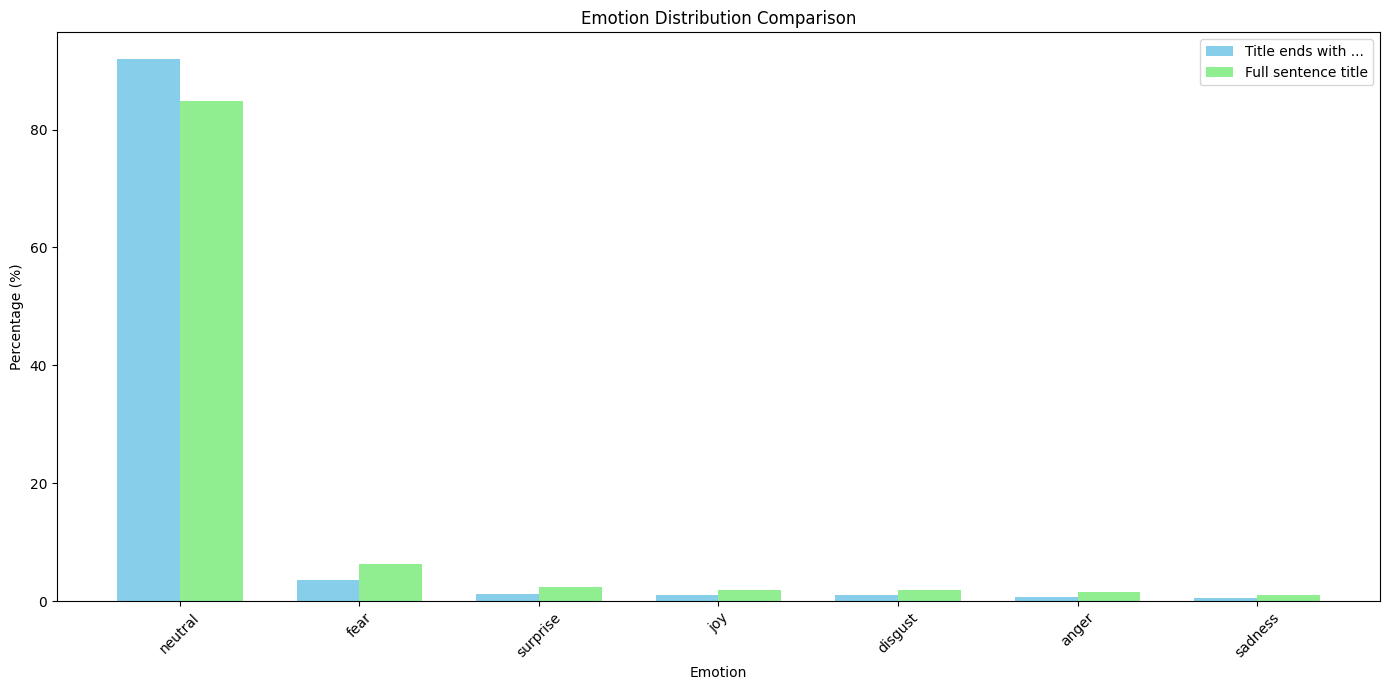

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

emotion_counts_notitle = notitle_df['emotion'].value_counts(normalize=True) * 100
emotion_counts_fulltitle = fulltitle_df['emotion'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 7))

bar_width = 0.35
index_notitle = np.arange(len(emotion_counts_notitle))
index_fulltitle = index_notitle + bar_width

plt.bar(index_notitle, emotion_counts_notitle.values, bar_width, label='Title ends with ...', color='skyblue')
plt.bar(index_fulltitle, emotion_counts_fulltitle.values, bar_width, label='Full sentence title', color='lightgreen')

plt.title('Emotion Distribution Comparison')
plt.ylabel('Percentage (%)')
plt.xlabel('Emotion')
plt.xticks(index_notitle + bar_width / 2, emotion_counts_notitle.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

More likely to be classified as neutral when a title ends with '...'

#### (2) Analyze only Full Sentence Title

In [ ]:
fulltitle_df.loc[fulltitle_df['emotion']=='fear',['translated_title']]

,translated_title
58,France to host next AI safety summit as Europe...
62,Apparition or plain hallucination?: ‘Unidentif...
74,Google Bard 'afraid' of Musk's super AI
93,Ted Chiang and Emily Bender worry about the da...
99,Deepfake: AI brings a big new menace
...,...
9974,UK reviews AI models as rapid growth fuels saf...
9975,Conservative AI Chatbot GIPPR Launches amid Fe...
9988,Why generative AI is more dangerous than you t...
9990,Rise of artificial intelligence is inevitable ...


#### (3) Proportion of Top 3 Emotions Grouped by Month

In [ ]:
fulltitle_df = fulltitle_df[fulltitle_df['emotion'].isin(['neutral', 'fear', 'surprise','joy'])]

In [ ]:
fulltitle_tmp = fulltitle_df[fulltitle_df['emotion'].isin(['neutral', 'fear', 'surprise'])]

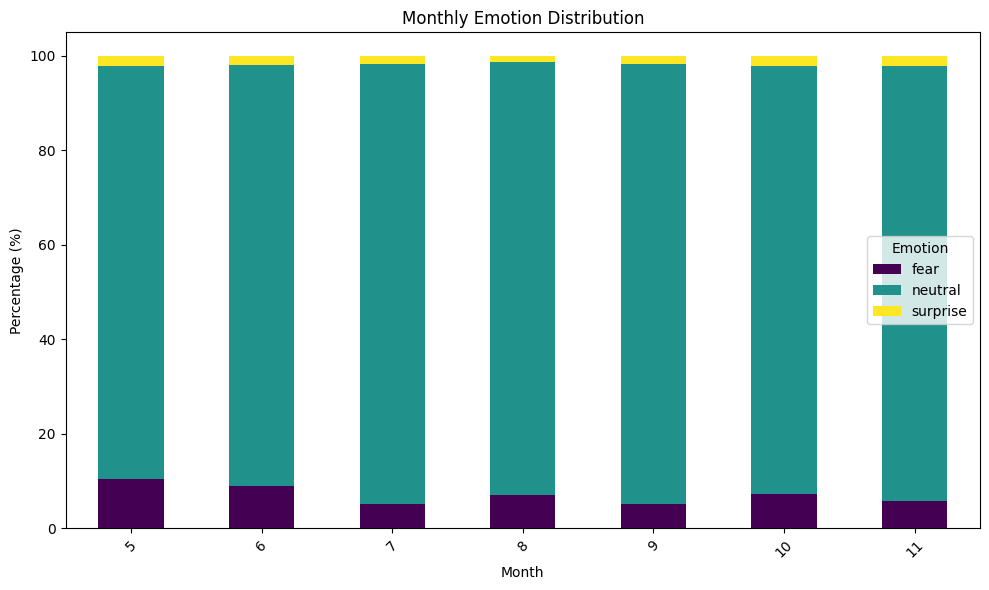

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

emotion_monthly = fulltitle_tmp.groupby(['month', 'emotion']).size().unstack(fill_value=0)
emotion_monthly_percentage = emotion_monthly.div(emotion_monthly.sum(axis=1), axis=0) * 100

emotion_monthly_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Monthly Emotion Distribution')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()


#### (4) Compare the Ratio with Number of News Media by Month

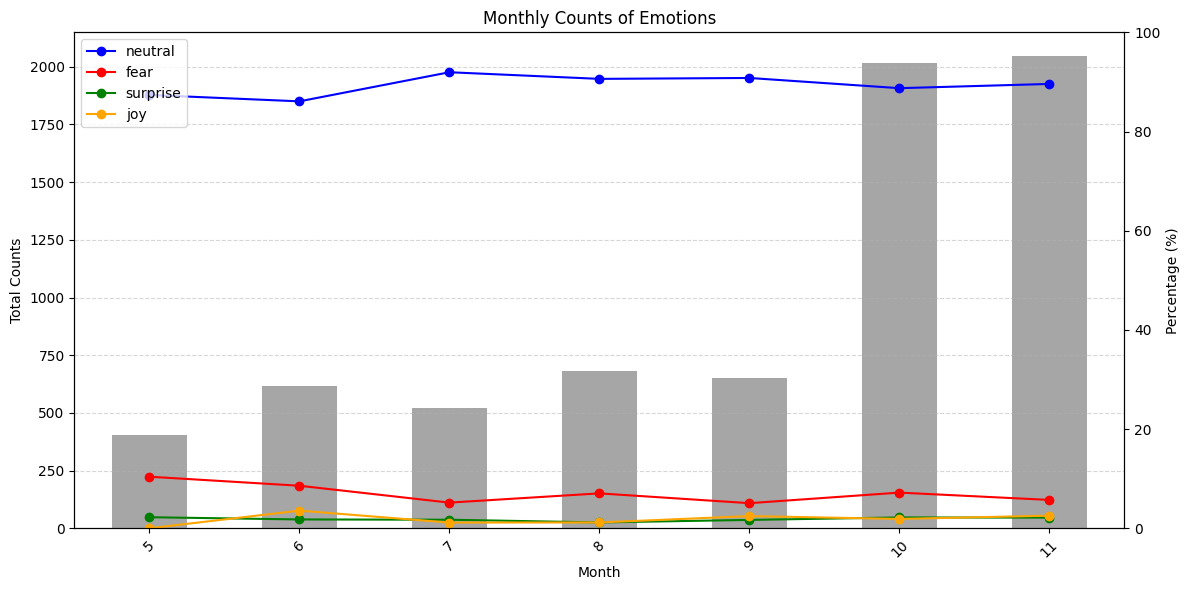

In [ ]:
import matplotlib.pyplot as plt

total_counts = fulltitle_df.groupby('month').size()
monthly_counts = fulltitle_df.groupby(['month', 'emotion']).size().unstack(fill_value=0)

monthly_counts.sum(axis=1).plot(kind='bar', color='gray', figsize=(12, 6), alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.title('Monthly Counts of Emotions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt2 = plt.twinx()

emotions = ['neutral', 'fear', 'surprise', 'joy']
colors = ['blue', 'red', 'green', 'orange']
for emotion, color in zip(emotions, colors):
    plt2.plot(monthly_counts.index-5, monthly_counts[emotion]*100/total_counts, linestyle='-', marker='o', color=color, label=emotion)

plt2.set_ylim(0, 100)
plt2.set_ylabel('Percentage (%)')
plt2.legend(loc='upper left')
plt.tight_layout()
plt.show()

### [3.2] Emotion-english-distilroberta-base Model (Model Training w/ human scoring)

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install datasets
!pip install bertviz
!pip install umap-learn
!pip install transformers torch pandas scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2023-05-01 to 2023-11-01
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       10000 non-null  object 
 1   link                        10000 non-null  object 
 2   source                      10000 non-null  object 
 3   country                     10000 non-null  object 
 4   language                    10000 non-null  object 
 5   translated_title            10000 non-null  object 
 6   number_of_characters_title  10000 non-null  int64  
 7   number_of_words_title       10000 non-null  int64  
 8   day_of_week                 10000 non-null  object 
 9   month                       10000 non-null  int64  
 10  year                        10000 non-null  int64  
 11  quarter                     10000 non-null  int64  
 12  is_weekend                  10000 non-null  int64  
 13  is_holiday    

#### (1) Calculate Sample size based on Central Limit Theorem : At least 385 headlines to be retrieved from the original dataset

In [ ]:
from math import sqrt

# Given values
Z = 1.96  # Z-score for 95% confidence
E = 0.05  # Margin of error
p = 0.5   # Conservative estimate of proportion
N = 10000 # Population size

# Calculate initial sample size (without finite population correction)
n = (Z**2 * p * (1-p)) / (E**2)

n

384.1599999999999

In [ ]:
sampled_titles = data.sample(n=385, random_state=42)[['news_title','number_of_words_title']]
sampled_titles

,news_title,number_of_words_title
date,,
2023-10-01,HungryRoot CEO Leverages Generative AI for 'Ev...,12
2023-10-01,How Aussie classrooms are using AI tutors,10
2023-07-01,Artificial Intelligence: Confronting challenge...,8
2023-10-01,EXCLUSIVE: Celebrity deep fake porn doubles in...,21
2023-10-01,Zendesk debuts new AI features for its custome...,13
...,...,...
2023-10-01,"LLMOps, the new great challenge of AI-oriented...",10
2023-10-01,Everyone needs to calm down about AI,9
2023-08-01,Everything has (not) changed: artificial intel...,12


#### (2) Conduct human scoring to sampled 385 headlines and import the sampled dataset  

In [ ]:
sampled_df = pd.read_csv("https://drive.google.com/uc?id=1g4BpMshHEnSbAZ9W1Qh5LfHLjai4rDdN")
sampled_df.head()

,index,text,emotion,number_of_words_title,emotion_test
0,0,Morgan Stanley to launch AI chatbot to woo the...,joy,12,neutral
1,1,THU AM News: Human expertise remains crucial i...,joy,13,neutral
2,2,Brave is another browser with AI. His chatbot ...,joy,16,neutral
3,3,UK man encouraged by an AI chatbot to kill Que...,anger,28,anger
4,4,AI-Driven Earthquake Forecasting Shows Promise...,joy,9,neutral


In [ ]:
# Define a mapping dictionary
label_dict = {'anger': 0, 'fear': 1, 'joy': 2, 'neutral': 3, 'sadness': 4, 'surprise': 5, 'disgust': 6}

# Apply the mapping to the 'emotion' column
sampled_df['emotion_labels'] = sampled_df['emotion_test'].apply(lambda x: label_dict[x])
sampled_df = sampled_df[['index','text','emotion_test', 'emotion_labels','number_of_words_title']]
sampled_df.head()

,index,text,emotion_test,emotion_labels,number_of_words_title
0,0,Morgan Stanley to launch AI chatbot to woo the...,neutral,3,12
1,1,THU AM News: Human expertise remains crucial i...,neutral,3,13
2,2,Brave is another browser with AI. His chatbot ...,neutral,3,16
3,3,UK man encouraged by an AI chatbot to kill Que...,anger,0,28
4,4,AI-Driven Earthquake Forecasting Shows Promise...,neutral,3,9


#### (3) Split sampled dataset into Train-validation-test (60-20-20)

In [ ]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(sampled_df, test_size=0.20, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
train_df.shape # 60%

(231, 5)

In [ ]:
val_df.shape # 20%

(77, 5)

In [ ]:
test_df.shape # 20%

(77, 5)

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [ ]:
# code for using GPU instead of CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


####(4) Tokenization and Encoding the lables (convert the text data into format that model can understand)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model.to(device)  # move model to GPU

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [ ]:
# Tokenize the text
def tokenize(dataframe):
    return tokenizer(sampled_df['text'].tolist(),
                     add_special_tokens=True,
                     max_length=512,
                     padding='max_length',
                     truncation=True,
                     return_tensors="pt")

train_encodings = tokenize(train_df)
val_encodings = tokenize(val_df)
test_encodings = tokenize(test_df)

In [ ]:
train_encodings

{'input_ids': tensor([[    0, 40102,  4725,  ...,     1,     1,     1],
        [    0,  3732,   791,  ...,     1,     1,     1],
        [    0, 46045,    16,  ...,     1,     1,     1],
        ...,
        [    0,  6179,  4687,  ...,     1,     1,     1],
        [    0, 15638, 30623,  ...,     1,     1,     1],
        [    0,  7083, 44345,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
train_df.head()

,index,text,emotion_test,emotion_labels,number_of_words_title
374,374,Is Nvidia Losing Artificial Intelligence (AI) ...,surprise,5,13
115,115,China targets 50% boost in computing power as ...,fear,1,16
299,299,‘It’s destroyed me completely’: Kenyan moderat...,fear,1,16
48,48,"Leader: Sure, AI could kill us — but it could ...",fear,1,16
32,32,Waker provides LLM-based US stock market analy...,neutral,3,13


####(5) Create Dataset Object (creating custom dataset class that outputs the tokenized text data and labels)

In [ ]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).to(device)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, train_df['emotion_labels'].tolist())
val_dataset = EmotionDataset(val_encodings, val_df['emotion_labels'].tolist())
test_dataset = EmotionDataset(test_encodings, test_df['emotion_labels'].tolist())

In [ ]:
train_dataset

####(6) Hyperparameter Tuning (Metrics used: Accuracy, F1 score, Precision, Recall)\

we ran learning rate of 2e-5, 3e-5, and 5e-5, but couldn't add all outputs in this notebook due to significantly long running time.\
Only output from learning rate of 2e-5 which we opted to use as the best model is shown here.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

In [ ]:
from transformers import Trainer, TrainingArguments
import logging

logging.basicConfig(level=logging.INFO)

batch_size = 8
model_name = "j-hartmann/emotion-english-distilroberta-base"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=8,
                                 learning_rate = 5e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False,
                                  logging_dir='./logs',            # Directory for storing logs.
                                  logging_steps=10,
                                  )
trainer = Trainer(
    model=model,
    compute_metrics=compute_metrics,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

<ipython-input-53-226b3a4bb863>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.316700,1.171276,0.402597,0.387140
2,1.131600,1.446823,0.519481,0.418244
3,0.794100,1.890301,0.402597,0.411196
4,0.444400,3.067022,0.376623,0.392318
5,0.198700,3.611193,0.389610,0.406288
6,0.051900,4.179880,0.376623,0.394050
7,0.058300,4.628752,0.363636,0.381916
8,0.025300,4.706569,0.363636,0.381916


<ipython-input-53-226b3a4bb863>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
<ipython-input-53-226b3a4bb863>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
<ipython-input-53-226b3a4bb863>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
<ipython-input-53-226b3a4bb863>:7: UserW

TrainOutput(global_step=232, training_loss=0.5454354887378627, metrics={'train_runtime': 103.8096, 'train_samples_per_second': 17.802, 'train_steps_per_second': 2.235, 'total_flos': 244821580996608.0, 'train_loss': 0.5454354887378627, 'epoch': 8.0})

####(7) Apply the model to the test dataset

In [ ]:
predictions = trainer.predict(test_dataset)
predictions.metrics

<ipython-input-53-226b3a4bb863>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}


{'test_loss': 4.919717788696289,
 'test_accuracy': 0.3116883116883117,
 'test_f1': 0.3226854930788069,
 'test_runtime': 1.2952,
 'test_samples_per_second': 59.451,
 'test_steps_per_second': 7.721}

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_preds = np.argmax(predictions.predictions, axis=1)
y_true = test_df['emotion_labels']

print(label_dict)
print(classification_report(y_true, y_preds))

{'anger': 0, 'fear': 1, 'joy': 2, 'neutral': 3, 'sadness': 4, 'surprise': 5, 'disgust': 6}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.30      0.26      0.28        23
           3       0.45      0.41      0.43        41
           4       0.00      0.00      0.00         3
           5       0.07      0.11      0.09         9

    accuracy                           0.31        77
   macro avg       0.16      0.16      0.16        77
weighted avg       0.34      0.31      0.32        77



#### (8) Final test with original dataset with 10,000 headlines

In [ ]:
original_df = data[['news_title','month']]

# Tokenize the new dataset
original_encodings = tokenizer(original_df['news_title'].tolist(),
                               add_special_tokens=True,
                               max_length=512,
                               padding='max_length',
                               truncation=True,
                               return_tensors="pt")

In [ ]:
class EmotionDatasetWithoutLabels(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

In [ ]:
# Create a dataset object for the new data
original_dataset = EmotionDatasetWithoutLabels(original_encodings)

In [ ]:
# Predict with the trained model
original_df_predictions = trainer.predict(original_dataset)

<ipython-input-61-5bcf1d468997>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}


In [ ]:
predicted_class_indices = np.argmax(original_df_predictions.predictions, axis=1)
label_dict = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'neutral', 4: 'sadness', 5: 'surprise', 6: 'disgust'}
predicted_labels = [label_dict[label_id] for label_id in predicted_class_indices]

In [ ]:
texts = original_df['news_title']
month = original_df['month']

# Create the DataFrame
df_result = pd.DataFrame({'text': texts, 'predicted_emotion': predicted_labels, 'month':month })
df_result

,text,predicted_emotion,month
date,,,
2023-05-01,Alexa Evolves with Advanced AI Technology: Ama...,neutral,5
2023-05-01,EU Moving Closer to an AI Act – Key Areas of I...,neutral,5
2023-05-01,World's first artificial intelligence law move...,neutral,5
2023-05-01,Character.AI and Google Cloud Partner to Build...,fear,5
2023-05-01,SAP and Google Cloud Expand Partnership to Bui...,surprise,5
...,...,...,...
2023-11-01,Recent updates on ChatGPT part1(Artificial Int...,neutral,11
2023-11-01,10 Human Jobs That Cannot Be Replaced by AI Ro...,surprise,11
2023-11-01,"Brave Launches ‘Leo’, Its AI Assistant Based i...",fear,11


In [ ]:
df_result['predicted_emotion'].value_counts()

neutral     6485
fear        2047
surprise    1260
sadness      127
anger         56
joy           14
disgust       11
Name: predicted_emotion, dtype: int64

####(9) Plot the result by Month to see the emotion trend over time

In [ ]:
emotion_counts_per_month = df_result.groupby(['month', 'predicted_emotion'])['predicted_emotion'].count().unstack().fillna(0).sort_values('month')
emotion_counts_per_month['total'] = emotion_counts_per_month['anger'] + emotion_counts_per_month['fear'] + emotion_counts_per_month['joy'] + emotion_counts_per_month['neutral'] + emotion_counts_per_month['sadness'] + emotion_counts_per_month['surprise'] + emotion_counts_per_month['disgust']
emotion_counts_per_month

predicted_emotion,anger,disgust,fear,joy,neutral,sadness,surprise,total
month,,,,,,,,
5,4.0,2.0,112.0,2.0,337.0,13.0,80.0,550.0
6,3.0,1.0,194.0,0.0,546.0,7.0,127.0,878.0
7,8.0,0.0,166.0,1.0,447.0,16.0,112.0,750.0
8,3.0,1.0,209.0,1.0,623.0,8.0,134.0,979.0
9,7.0,0.0,210.0,1.0,593.0,13.0,111.0,935.0
10,17.0,3.0,582.0,4.0,1927.0,30.0,354.0,2917.0
11,14.0,4.0,574.0,5.0,2012.0,40.0,342.0,2991.0


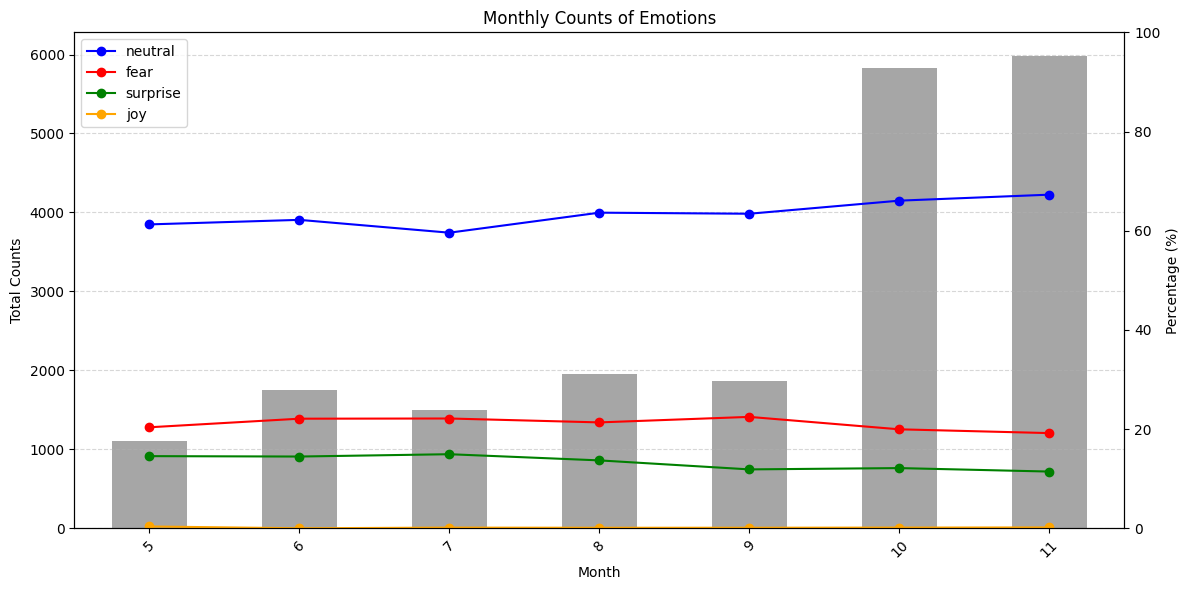

In [ ]:
total_counts = original_df.groupby('month').size()

emotion_counts_per_month.sum(axis=1).plot(kind='bar', color='gray', figsize=(12, 6), alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.title('Monthly Counts of Emotions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt2 = plt.twinx()

emotions = ['neutral', 'fear', 'surprise', 'joy']
color = ['blue', 'red', 'green', 'orange']
for emotion, color in zip(emotions, color):
    plt2.plot(emotion_counts_per_month.index-5, emotion_counts_per_month[emotion]*100/total_counts, color=color, linestyle='-', marker='o', label=emotion)

plt2.set_ylim(0, 100)
plt2.set_ylabel('Percentage (%)')
plt2.legend(loc='upper left')
plt.tight_layout()
plt.show()